\newpage

@misc

### Q1

A classification problem involves predicting categorical labels for given input data. Using the Heart Disease dataset, the task is to classify whether a patient has heart disease based on 13 features such as age, sex, chest pain type, resting blood pressure, cholesterol levels, and others. The target variable, num, will be converted to a binary outcome: presence or absence of heart disease.

### Q2

In [550]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
y = heart_disease.data.targets 
    
print(heart_disease.variables)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

We observed that there are missing values in some variables, we need to drop these values before data transformation.

In [551]:
import pandas as pd
data = pd.concat([X, y], axis=1)
data.shape

(303, 14)

In [552]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [553]:
missing_val = data.isnull().sum().sum()
missing_val

np.int64(6)

There are 6 missing values in original dataset

In [554]:
data_cleaned = data.dropna()
data_cleaned.shape

(297, 14)

In [555]:
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [556]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal' ,'ca']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_col = pd.DataFrame(encoder.fit_transform(data_cleaned[categorical_col]), 
                           columns=encoder.get_feature_names_out(categorical_col), 
                           index=data_cleaned.index)

print(encoded_col.shape)
trans_data = pd.concat([data_cleaned.drop(columns=categorical_col), encoded_col], axis=1)
print(trans_data.shape)

continuous_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
trans_data[continuous_col] = scaler.fit_transform(data_cleaned[continuous_col])

(297, 15)
(297, 21)


In [557]:
trans_data.head()

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Categorical Encoding:
    - Transforming categorical variables into OneHotEncoding representations allows algorithms to process these features effectively.
    - Although ca is stored as an integer, it represents the number of major vessels (0–3) visualized via fluoroscopy, which is a categorical rather than continuous concept. Therefore, treating ca as a categorical variable and applying OneHotEncoding helps prevent misleading the model into assuming numerical continuity or ordering.

    
- Standardization:
    - Scaling continuous variables ensures that features contribute equally to model training, especially for distance-based algorithms.

### Q3

In [558]:
data_info = data.info()
data_descrip = data.describe(include='all')
data_distr = data['num'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [559]:
print(data_descrip)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [560]:
print(data_distr)

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [561]:
trans_data_info = trans_data.info()
trans_data_descrip = trans_data.describe(include='all')
trans_data_distr = trans_data['num'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   trestbps   297 non-null    float64
 2   chol       297 non-null    float64
 3   thalach    297 non-null    float64
 4   oldpeak    297 non-null    float64
 5   num        297 non-null    int64  
 6   sex_1      297 non-null    float64
 7   cp_2       297 non-null    float64
 8   cp_3       297 non-null    float64
 9   cp_4       297 non-null    float64
 10  fbs_1      297 non-null    float64
 11  restecg_1  297 non-null    float64
 12  restecg_2  297 non-null    float64
 13  exang_1    297 non-null    float64
 14  slope_2    297 non-null    float64
 15  slope_3    297 non-null    float64
 16  thal_6.0   297 non-null    float64
 17  thal_7.0   297 non-null    float64
 18  ca_1.0     297 non-null    float64
 19  ca_2.0     297 non-null    float64
 20  ca_3.0     297 

In [562]:
print(trans_data_descrip)

                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.226105e-16  4.904420e-16 -1.958777e-16  4.784800e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

              num       sex_1        cp_2        cp_3        cp_4  ...  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  ...   
mean     0.946128    0.676768    0.164983    0.279461    0.478114  ...   
std      1.234551    0.468500    0.371792    0.449492    0.500364  ...   
min      0

In [563]:
print(trans_data_distr)

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


- Original Dataset (data)
    - The dataset contains 303 observations and 14 variables. 
    - 13 features and 1 target variable num.

- Variable Types:
    - Categorical Variables: sex, cp, fbs, restecg, exang, slope, thal, ca.
    - Numerical Variables: age, trestbps, chol, thalach, oldpeak.

- Data Types:
    - Categorical variables are represented as integers, while continuous variables are represented as integers or floats.

- Target Variable Distribution:
    - The target variable num has 5 unique classes: 0, 1, 2, 3, 4, representing different levels of heart disease severity. 

num

0:    164

1:     55

2:     36

3:     35

4:     13

    - Data in each category is highly unbalanced, we can transform it into a binary classification problem.


- Transformed Dataset (trans_data)
    - The transformed dataset contains 297 observations and 21 variables. The number of variables increases due to the OneHotEncoding of categorical variables.
    - We dropped missing values before data transformation, so there are only 297 observations

- Variable Transformation:
    - Categorical Variables: Encoded using OneHotEncoding with the drop='first' parameter to avoid perfect multicollinearity. 

    - Continuous Variables: Standardized using StandardScaler() to have a mean of 0 and a variance of 1, making them suitable for algorithms sensitive to feature scales.

### Q4

In [564]:
trans_data['num'] = trans_data['num'].apply(lambda x: 1 if x > 0 else 0)

### Q5

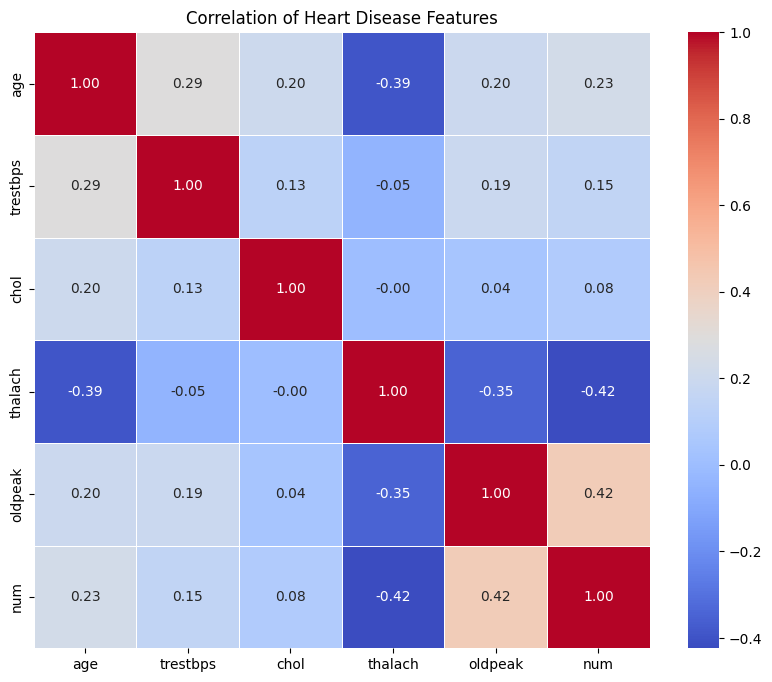

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = trans_data[continuous_col + ['num']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation of Heart Disease Features")
plt.show()


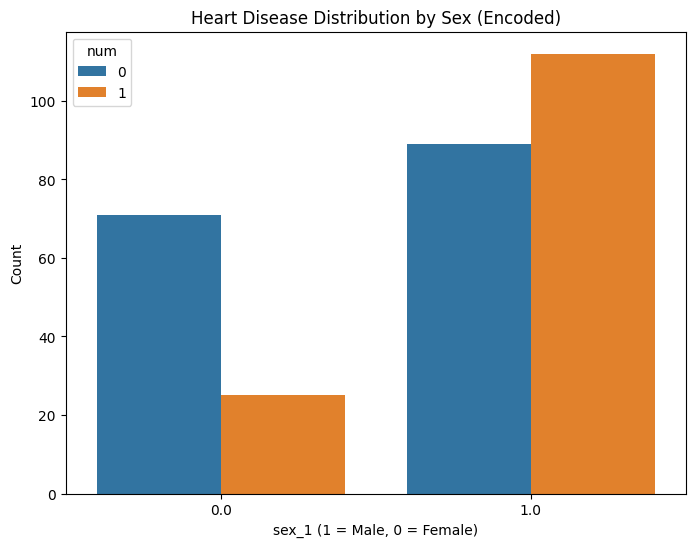

In [566]:
sex_counts = trans_data.groupby(['sex_1', 'num']).size().reset_index(name='count')
sex_counts['sex_1'] = sex_counts['sex_1'].astype(str)
sex_counts['num'] = sex_counts['num'].astype(str)

plt.figure(figsize=(8, 6))
sns.barplot(data=sex_counts, x='sex_1', y='count', hue='num')

plt.xlabel("sex_1 (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.title("Heart Disease Distribution by Sex (Encoded)")
plt.show()

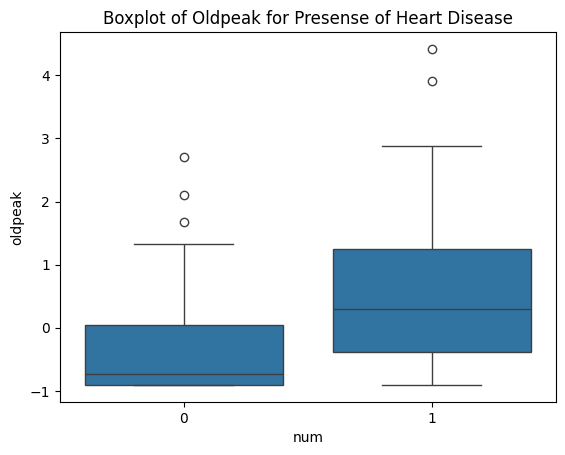

In [567]:
sns.boxplot(x='num', y='oldpeak', data=trans_data)
plt.title('Boxplot of Oldpeak for Presense of Heart Disease')
plt.show()

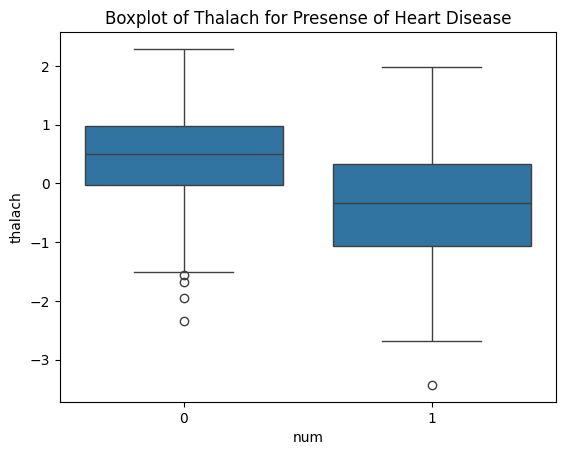

In [568]:
sns.boxplot(x='num', y='thalach', data=trans_data)
plt.title('Boxplot of Thalach for Presense of Heart Disease')
plt.show()

- Variable 'thalach' is negatively correlated with our target, the presence of heart disease (num), at a correlation=-0.42, while variable 'oldpeak' is positively correlated with the presence of heart disease, at a correlation= 0.42. These findings suggest that both variables are highly useful and informative for predicting the presence of heart disease.

- The correlation of ‘trestbps’ and ‘chol’  with the target variable is relatively low, indicating they may contribute less to predictive performance.

- The plot of the 'sex_1' variable shows that males have a higher count of heart disease cases compared to females. This implies that sex is a meaningful and useful feature and may enhance the classification performance.

- The boxplots show the distribution of ‘oldpeak’ and ‘thalach’ for patients with and without heart disease is completely different. People have higher 'oldpeak' values and lower 'thalach' values are more commonly to have the heart disease.

### Q6

In [569]:
missing_val = data.isnull().sum().sum()
missing_val

np.int64(6)

We need to use original dataset to check if there exists missing values. There are 6 missing values

In [570]:
data_cleaned_2 = trans_data.dropna()
data_cleaned_2.shape

(297, 21)

There are 297 osbervations after dropping the missing values

Since I already completed data preprocessing and transformation in Question 2, the code here is only intended to demonstrate the number of missing values and how they are handled. In the following tasks, we will only use the preprocessed dataset named `trans_data`.

### Q7

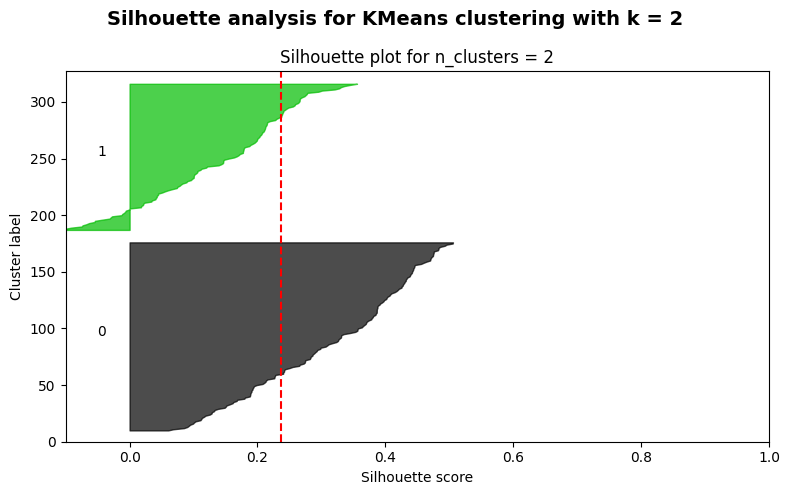

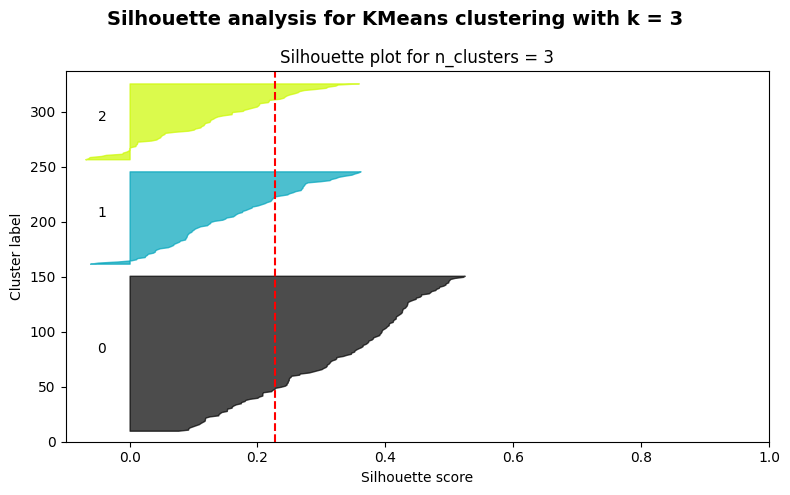

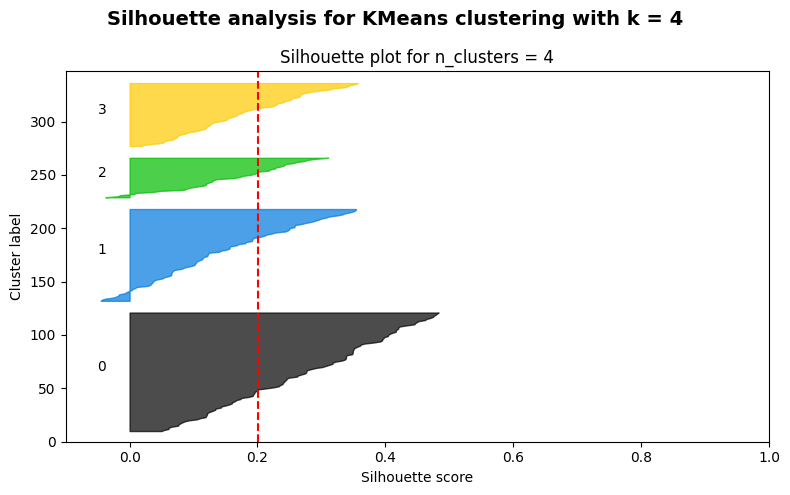

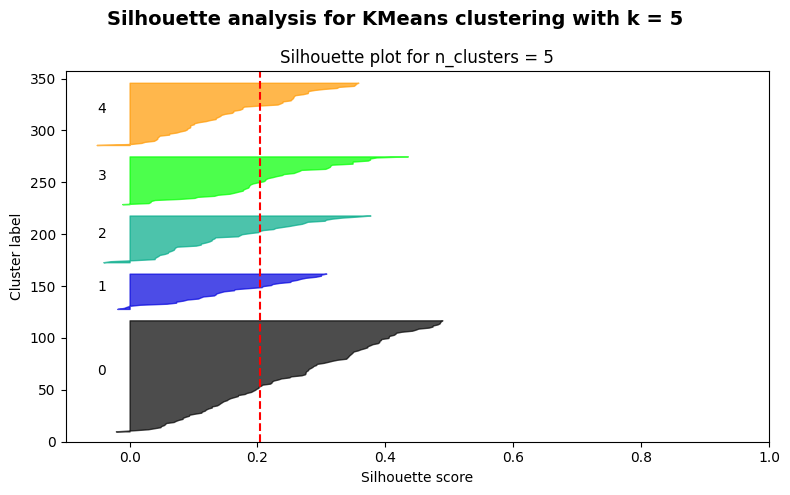

In [571]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X_con = trans_data[continuous_col]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_con)
silhouette_scores = []
range_n_clusters = range(2, 6)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

   
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels_km = km.fit_predict(X_scaled)

    silhouette_avg_km = silhouette_score(X_scaled, cluster_labels_km)
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_km)
    y_lower = 10
    silhouette_scores.append(silhouette_avg_km)
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    ax1.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette score")
    ax1.set_ylabel("Cluster label")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with k = {n_clusters}",
        fontsize=14,
        fontweight="bold"
    )
    plt.tight_layout()
    plt.show()

In [572]:
best_k = range_n_clusters[np.argmax(silhouette_scores)]
best_k

2

In [573]:
km2 = KMeans(n_clusters=best_k, n_init=20, random_state=0)
cluster_labels_km2 = km2.fit_predict(X_scaled)
silhouette_score(X_scaled, cluster_labels_km2).round(2)

np.float64(0.24)

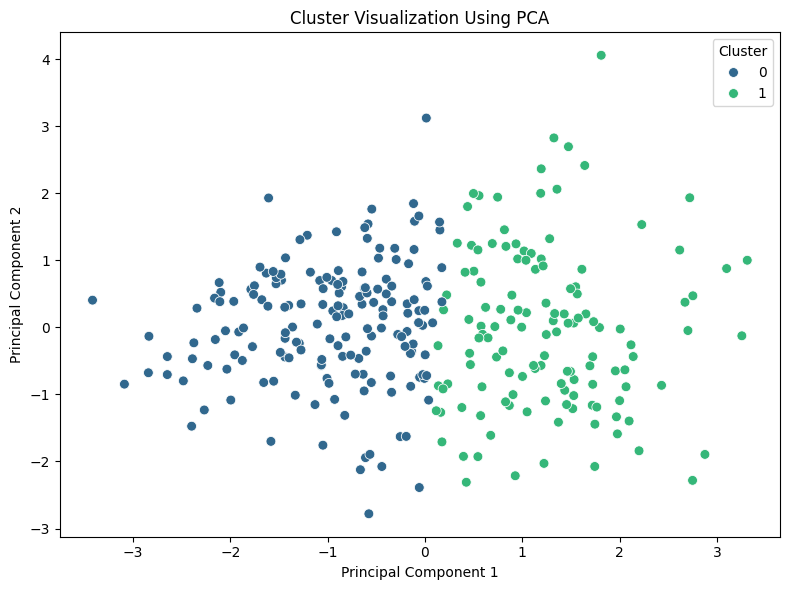

In [574]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=0)
pca_X = PCA(n_components=2)

pca_data = pd.DataFrame(pca_X.fit_transform(X_scaled), columns=["PC1", "PC2"])
pca_data["Cluster"] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue=pca_data['Cluster'], palette='viridis', s=50)
plt.title("Cluster Visualization Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### Q8

In [575]:
from sklearn.model_selection import train_test_split

X = trans_data.drop(columns=['num'])
y = trans_data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [576]:
X_train.shape

(207, 20)

In [577]:
X_test.shape[0]

90

### Q9

In [578]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression(random_state=1)
random_forest_model = RandomForestClassifier(random_state=1)

The two classifiers I have chosen are Logistic Regression and Random Forest. Logistic Regression is a highly interpretable model that allows for in-depth analysis and inference, fulfilling the classifier requirement. On the other hand, Random Forest is a powerful ensemble model known for its high accuracy and robustness, providing a complementary approach to Logistic Regression.

### Q10

**Accuracy and F1-score**

- Accuracy measures the proportion of correctly classified observations among the total observations. Accuracy is suitable when the dataset is balanced, meaning the positive and negative classes have approximately the same number of observations. However, it may be misleading for imbalanced datasets.

- F1-Score is the harmonic mean of Precision and Recall. It is particularly useful when dealing with imbalanced datasets, as it takes into account both false positives and false negatives.

### Q11

In [579]:
from sklearn.model_selection import GridSearchCV

In [580]:
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5, scoring='accuracy', n_jobs=-1)
logistic_grid.fit(X_train, y_train)

best_logistic_model = logistic_grid.best_estimator_
best_logistic_params = logistic_grid.best_params_
logistic_best_score = logistic_grid.best_score_

In [581]:
forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

forest_grid = GridSearchCV(random_forest_model, forest_params, cv=5, scoring='accuracy', n_jobs=-1)
forest_grid.fit(X_train, y_train)

best_forest_model = forest_grid.best_estimator_
best_forest_params = forest_grid.best_params_
forest_best_score = forest_grid.best_score_

In [582]:
print("Best Logistic Regression Parameters:", best_logistic_params)
print("Best Logistic Regression Score (Training):", logistic_best_score)
print("\nBest Random Forest Parameters:", best_forest_params)
print("Best Random Forest Score (Training):", forest_best_score)

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score (Training): 0.8505226480836237

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Score (Training): 0.8311265969802555


### Q12

In [583]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [584]:
pc_count = pca.components_.shape[0]
pc_count

20

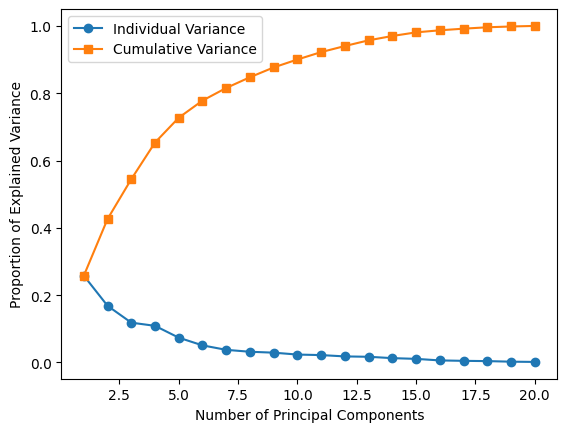

In [585]:

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, '-o', label="Individual Variance")
plt.plot(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), '-s', label="Cumulative Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.legend()
plt.show()

By elbow rule, we choose 6 principal components since the variance explained by the remaining principal components increases slower and slower. The first 6 principal components account for approximately 80% of the total variance.

In [586]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [587]:
logreg_fe_para = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}


logreg_fe_grid = GridSearchCV(logistic_model, logreg_fe_para, cv=5, scoring='accuracy')
logreg_fe_grid.fit(X_train_pca, y_train)

best_logreg_fe_model = logreg_fe_grid.best_estimator_
best_logreg_fe_para = logreg_fe_grid.best_params_
best_logreg_fe_score = logreg_fe_grid.best_score_

In [588]:
best_logreg_fe_para

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [589]:
best_logreg_fe_score

np.float64(0.8065040650406503)

The cv score is the highest when the parameter is c =0.1 penalty= 'l2' and solver ='lbfgs' at 0.8065.

### Q13

In [590]:
logistic_model = best_logistic_model
random_forest_model = best_forest_model

In [591]:
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=1)

In [592]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_forest = random_forest_model.predict(X_test)

In [593]:
from sklearn.metrics import accuracy_score, f1_score

In [594]:
acc_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


In [595]:
acc_forest = accuracy_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)

In [596]:
print("Logistic Regression Results (Test Set):")
print(f"Accuracy: {acc_logistic:.4f}")
print(f"F1-score: {f1_logistic:.4f}")

Logistic Regression Results (Test Set):
Accuracy: 0.8000
F1-score: 0.7805


In [597]:
print("Random Forest Results (Test Set):")
print(f"Accuracy: {acc_forest:.4f}")
print(f"F1-score: {f1_forest:.4f}")

Random Forest Results (Test Set):
Accuracy: 0.8000
F1-score: 0.7805


In [598]:
from sklearn.metrics import confusion_matrix

In [599]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Confusion Matrix - Logistic Regression:")
print(cm_logistic)

Confusion Matrix - Logistic Regression:
[[40 11]
 [ 7 32]]


In [600]:
cm_forest = confusion_matrix(y_test, y_pred_forest)

print("Confusion Matrix - Random Forest:")
print(cm_forest)

Confusion Matrix - Random Forest:
[[40 11]
 [ 7 32]]


In [601]:
np.array_equal(y_pred_logistic, y_pred_forest)

False

Using the default evaluation metrics, Accuracy and F1-score, I observed that both the Logistic Regression and Random Forest classifiers achieved identical performance on the test set:

- Accuracy = 0.8000, F1-score = 0.7805.

- This initially suggested that both models might be making the same predictions.

To further investigate, I examined the confusion matrices of both models and found them to be identical, indicating the same numbers of true positives, true negatives, false positives, and false negatives.

Upon using np.array_equal() to compare the predicted labels, I discovered that the predictions were not exactly the same across the two models.

- This implies that although both models made the same number of correct and incorrect predictions, they did so on different individual test instances.

- Therefore, the two models achieved equivalent performance by taking different decision paths.

In [614]:
y_pred_logreg_fe = best_logreg_fe_model.predict(X_test_pca)

In [615]:
acc_logreg_fe = accuracy_score(y_test, y_pred_logreg_fe)
f1_logreg_fe = f1_score(y_test, y_pred_logreg_fe)

In [616]:
acc_logreg_fe

0.7777777777777778

In [617]:
f1_logreg_fe

0.7435897435897436

- The logistic regression with feature extration model  has an accuracy at 0.7778 and F1-score at 0.7436 on the test set, which is lower than the logistic regression model in Q11. 

- Applying PCA before training reduced the dimensionality of the dataset, but resulted in lower classification performance. This is likely because PCA does not consider the target variable during feature extraction, and some discriminative features may have been lost in the transformation.

### Q14

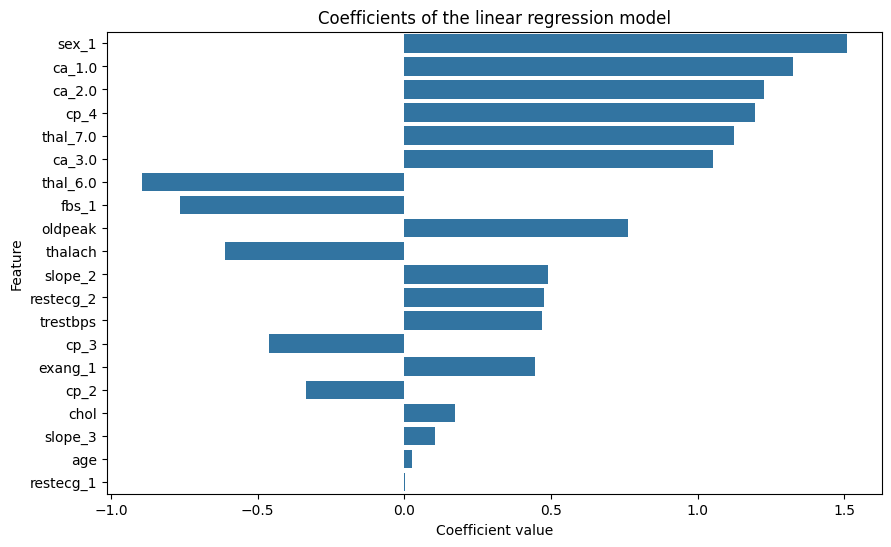

In [606]:
coeffcients = best_logistic_model.coef_[0]

feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffcients})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coefficients of the linear regression model')
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.show()

- The feature sex_1 has the largest positive coefficient in the logistic regression model. Since sex_1 corresponds to male patients, this indicates that being male is strongly associated with a higher likelihood of heart disease in this dataset.

- The features ca_1.0, ca_2.0, and ca_3.0 represent patients with 1, 2, or 3 major vessels colored by fluoroscopy, respectively. Their large positive coefficients suggest that having more major vessels detected via fluoroscopy is a strong predictor of heart disease.

- Conversely, thal_6.0 has a large negative coefficient, suggesting that this thalassemia category is associated with lower risk. This indicates that different thalassemia types may carry significant discriminative information about heart health.

### Q15

**Sub-group Improvement Strategy Description**

- We observed that the model's performance on the female subgroup was lower than that on the male subgroup. We explored a sample weighting strategy using logistic regression to improve the performance for female patients without significantly reducing the overall model performance.



In [607]:
female_idx = X_test['sex_1'] == 0
male_idx = X_test['sex_1'] == 1

f1_female = f1_score(y_test[female_idx], y_pred_logistic[female_idx])
f1_male = f1_score(y_test[male_idx], y_pred_logistic[male_idx])


In [608]:
f1_female

0.7272727272727273

In [609]:
f1_male

0.7887323943661971

The F1-scores of male and female are 0.7273 and 0.7887 respectively.

- We assigned higher sample weights to female observations during training, while keeping the weight for male samples fixed at 1.0. We experimented with a range of weights from 1.1 to 2.0 and evaluated the model’s performance across subgroups.


In [ ]:
sample_weights_range = np.round(np.arange(1.1, 2.05, 0.1), 2)

results = []

for w in sample_weights_range:
    sample_weight = np.where(X_train['sex_1'] == 0, w, 1.0)

    model = LogisticRegression(C=1, solver='lbfgs', penalty='l2', random_state=1)
    model.fit(X_train, y_train, sample_weight=sample_weight)

    y_pred = model.predict(X_test)

    f1_overall = f1_score(y_test, y_pred)
    f1_female = f1_score(y_test[X_test['sex_1'] == 0], y_pred[X_test['sex_1'] == 0])
    f1_male = f1_score(y_test[X_test['sex_1'] == 1], y_pred[X_test['sex_1'] == 1])

    results.append({
        'sample_weight': w,
        'f1_female': f1_female,
        'f1_male': f1_male,
        'f1_overall': f1_overall
    })



In [619]:
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='f1_female', ascending=False)
results_df_sorted

,sample_weight,f1_female,f1_male,f1_overall
2,1.3,0.833333,0.788732,0.795181
3,1.4,0.833333,0.788732,0.795181
4,1.5,0.833333,0.788732,0.795181
5,1.6,0.833333,0.788732,0.795181
6,1.7,0.833333,0.788732,0.795181
7,1.8,0.833333,0.788732,0.795181
8,1.9,0.833333,0.788732,0.795181
9,2.0,0.833333,0.788732,0.795181
0,1.1,0.727273,0.788732,0.780488
1,1.2,0.727273,0.788732,0.780488


- The results were visualized using a line plot showing the F1-scores for the female subgroup, male subgroup, and overall, as a function of the sample weight. We found that several weights improved the female F1-score with minimal impact on overall performance.


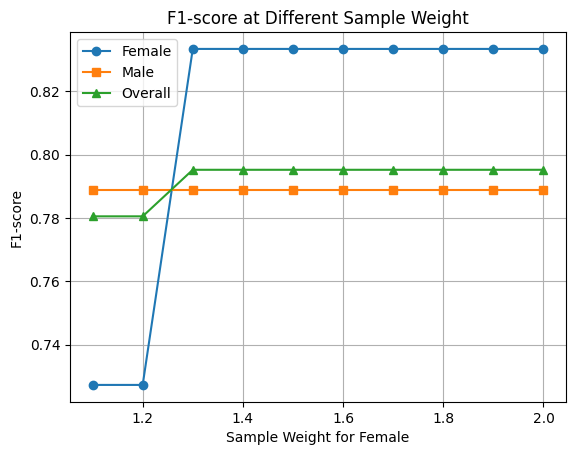

In [620]:
plt.plot(results_df['sample_weight'], results_df['f1_female'], marker='o', label='Female')
plt.plot(results_df['sample_weight'], results_df['f1_male'], marker='s', label='Male')
plt.plot(results_df['sample_weight'], results_df['f1_overall'], marker='^', label='Overall')

plt.xlabel('Sample Weight for Female')
plt.ylabel('F1-score')
plt.title('F1-score at Different Sample Weight')

plt.legend()
plt.grid(True)
plt.show()

In [623]:
sample_weight = np.where(X_train['sex_1'] == 0, 1.3, 1.0)

imporved_lr_model = LogisticRegression(C=1, solver='lbfgs', penalty='l2', random_state=1)
imporved_lr_model.fit(X_train, y_train, sample_weight)

lr_y_pred_improved = imporved_lr_model.predict(X_test)

lr_improved_accuracy = accuracy_score(y_test, lr_y_pred_improved)
lr_improved_f1 = f1_score(y_test, lr_y_pred_improved)

print("Logistic Regression with sample_weight = 1.3")
print(f"Test Accuracy: {lr_improved_accuracy:.4f}")
print(f"Test F1-score: {lr_improved_f1:.4f}")

Logistic Regression with sample_weight = 1.3
Test Accuracy: 0.8111
Test F1-score: 0.7952


- To avoid over-biasing the model, we selected the smallest effective weight, 1.3, which provided a clear performance improvement for the female subgroup while maintaining a high overall F1-score.

- The f1-score for female without weight is 0.7273. It is lower than the f1-score when we assigned a weight of 1.3 to female at 0.8333.

- The overall test accuracy and f1-score of the logistic regression model is higher than the model in Q13 at 0.8111 and 0.7952 respecively after assigning a weight at 1.3 to female.

### Q16

- Xingyu Lin: Q1-Q4, Q6, Q8-Q11, Q13 (Fisrt and second model and Discussion).

- Jasper Xu: Q5, Q7, Q12, Q13 (Third model and Impact), Q14, Q15.

### Q17

https://github.com/SimonLinxy/STATS3DA3_A6

\newpage

### Reference